In [3]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install spacy
!pip install jsonlines
!python -m spacy download en_core_web_lg
import importlib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score , accuracy_score



import Emuser_package as em
import Emuser_NN_package as enm
importlib.reload(em)
importlib.reload(enm)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-05 05:04:32.392676: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 05:04:34.370101: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-05 05:04:37.384583: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-05 05:04:37.386858

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Packag

<module 'Emuser_NN_package' from '/content/Emuser_NN_package.py'>

In [4]:
# load dataset into the module 
df = pd.read_csv("Resume.csv")
df.drop("Resume_html", inplace = True, axis = 1)
emuser = em.Emuser()
#em.print_help(emuser)
predicted_entity_df = emuser.predict(df)
predicted_entity_df.to_csv("predicted_entity.csv")

KeyboardInterrupt: ignored

In [3]:
emuser.visualize_entities([predicted_entity_df['DOC'][0]])

In [4]:
# load dataset into the module 
df = pd.read_csv("Resume_updated_people.csv")
df.drop("Resume_html", inplace = True, axis = 1)
emuser = em.Emuser()
#em.print_help(emuser)
predicted_entity_df = emuser.predict(df)
emuser.visualize_entities([predicted_entity_df['DOC'][0]])

finding the entities of record between 0   4  ...... please wait


In [1]:
'''
def get_variables(d):
'''
    #:param d: dictionary of the object created
    #:return: list of variables along with their datatype
'''

    def get_type(x):
        # Prints the type of a variable in a slightly more readable fashion
        x = str(type(x))
        # convert type(string variable) from "class 'str's" to "str"
        g = re.search("\' ([^\']+)\'", x)
        if g:
            x = g.group(1)
        return x

    #
    variables = [(str(k) + ' [' + get_type(v) + ']') for k, v in d.items()]
    if len(variables) == 0:
        variables = ['-']
    return variables


def get_methods(o):
'''
    #:param o: the emuser object
    #:return: the list of method present in the object
'''
    return sorted(
        [name for name, description in inspect.getmembers(o, predicate=inspect.ismethod) if name != '__init__'],
        reverse=True)


def print_variables_and_methods(o):
    print("--------------")
    print("Variables : ")
    for x in get_variables(o.__dict__):
        print("\t", x)
    print("--------------")
    print()
    print("--------------")
    print("Methods : ")
    for x in get_methods(o):
        print("\t", x)
    print("--------------")


def print_help(o):
    print("Fetching the metadata of the class")
    return print_variables_and_methods(o)


class Emuser_NN:
  def __init__(self, dataset):
    self.name = "Resume classification neural network model "
    self.dataset = dataset
    self.categories = []
    self.X = None
    self.y = None
    self.vectorizer = CountVectorizer()
    self.model = None
    self.final_model = None
    
  
  def clean_text(self,text):
  
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([word for word in re.split('\W+', text_cleaned)])
    return text

  # clean the text in the dataframe using the clean_text function provided above
  def process_data(self):
    if self.X == None or self.y == None:
      #self.X = self.dataset.ENTS.map(lambda x : ' '.join([ent.text for ent in x]))
      self.X = self.dataset.Resume_str
      self.y = self.dataset.Category
      self.y = pd.get_dummies(self.y)
      self.categories = self.y.columns
      self.y = self.y.to_numpy()

    for index in range(0,len(self.X)):
        self.X[index] = self.clean_text(self.X[index])

    return self.X, self.y
  
  def vectorize(self):
    # fit and transform on dataset
    self.vectorizer.fit(self.X)
    self.X = self.vectorizer.transform(self.X)
  
  # complete this linear model in tensorflow
  def build_model(self, X):
      
      # layer 1 : input layer
      inp = tf.keras.Input((X.shape[1],))

      # layer 2 : add the dense layer with 64 units and relu activation
      out = tf.keras.layers.Dense(64, activation = 'tanh')(inp)

      # layer 3 : add the dropout layer with dropout rate of 0.5
      out = tf.keras.layers.Dropout(0.3)(out)

      # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
      out = tf.keras.layers.Dense(64, activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l2())(out)

      # layer 5 : add the dropout layer with dropout rate of 0.5
      out = tf.keras.layers.Dropout(0.3)(out)

      # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
      out = tf.keras.layers.Dense(64, activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l2())(out)

      # layer 7 : add the dropout layer with dropout rate of 0.5
      out = tf.keras.layers.Dropout(0.3)(out)

      # layer 8 : output layer with units equal to 24 and activation as softmax
      out = tf.keras.layers.Dense(24, activation = 'softmax')(out)

      # use loss as Catgorical crossentropy, optimizer as rmsprop and evaluate model on auc 

      model = tf.keras.models.Model(inputs=inp, outputs=out)

      optimizer = tf.keras.optimizers.Adam()

      model.compile(loss = 'categorical_crossentropy', 
                    optimizer = optimizer, 
                    metrics = ['AUC', 'Precision', 'Recall', 'accuracy'])

      return model

  def train_kfold(self, k_folds):
    # Now we will initialise the stratified K-Fold from sklearn with nsplits as 5

    skf = StratifiedKFold(n_splits=k_folds)

    # Now Split the countvectors and target (y)
    target = self.y
    splits = skf.split(self.X, self.dataset.Category)

    final_model = None
    previous_loss = float('Inf')

    # iterate through the train and valid index in splits for 5 folds
    for train_index, test_index in splits:
      # Get X_train, X_valid, y_train, y_valid using indexes
      X_train, X_valid = self.X[train_index].toarray(), self.X[test_index].toarray()
      y_train, y_valid = self.y[train_index], self.y[test_index]
      print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)
      #call the build_model function and initialize the model
      model = self.build_model(X_train)

      # train and validate the model on the count vectors of text which we have created initially for 5 epochs, 
      # adjust batch size according to your computation power (suggestion use : 16)
      fit_nn_model = model.fit(X_train, y_train, 
                                    batch_size=8, epochs = 5, 
                                    validation_data=(X_valid, y_valid))
      
      if min(fit_nn_model.history['val_loss']) < previous_loss:
        previous_loss = min(fit_nn_model.history['val_loss'])
        final_model = model

      # plot the graph between training auc and validation auc
      plt.plot(fit_nn_model.history['loss'])
      plt.plot(fit_nn_model.history['val_loss'])

    return final_model


  def train(self, k_folds = 5):
    self.X, self.y = self.process_data()
    self.vectorize()
    self.model = self.build_model(self.X)
    print(self.model.summary())
    self.final_model = self.train_kfold(k_folds = k_folds)
  
  def get_transformed_values(self):
    return self.final_model
  
  def predict(self, X_test):
    self.y_pred = []

    if self.final_model is None:
      self.train()
    cleaned_X_test = []
    for text in X_test:
      cleaned_X_test.append(self.clean_text(text))

    X_test = self.vectorizer.transform(cleaned_X_test)
    results = self.final_model.predict(X_test)

    for result in results:
      result_category = self.categories[np.where(result==max(result))[0][0]]
      self.y_pred.append(result_category)
    return self.y_pred
  
  def evaluation_metrics(self, y_test, y_pred):
    self.acc_score = accuracy_score(y_pred, y_test)
    return self.acc_score
'''

'\n    return sorted(\n        [name for name, description in inspect.getmembers(o, predicate=inspect.ismethod) if name != \'__init__\'],\n        reverse=True)\n\n\ndef print_variables_and_methods(o):\n    print("--------------")\n    print("Variables : ")\n    for x in get_variables(o.__dict__):\n        print("\t", x)\n    print("--------------")\n    print()\n    print("--------------")\n    print("Methods : ")\n    for x in get_methods(o):\n        print("\t", x)\n    print("--------------")\n\n\ndef print_help(o):\n    print("Fetching the metadata of the class")\n    return print_variables_and_methods(o)\n\n\nclass Emuser_NN:\n  def __init__(self, dataset):\n    self.name = "Resume classification neural network model "\n    self.dataset = dataset\n    self.categories = []\n    self.X = None\n    self.y = None\n    self.vectorizer = CountVectorizer()\n    self.model = None\n    self.final_model = None\n    \n  \n  def clean_text(self,text):\n  \n  # From the last assignment\n    t

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 53954)]           0         
                                                                 
 dense (Dense)               (None, 64)                3453120   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0     

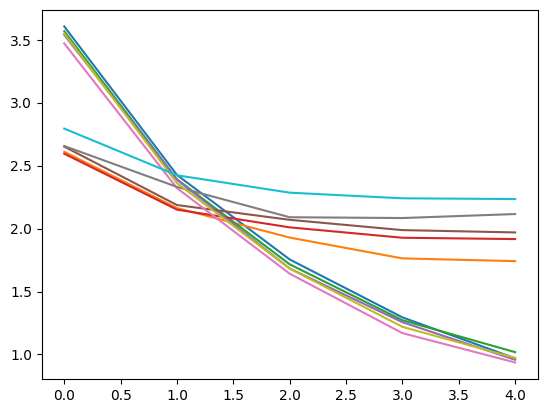

In [5]:
df = pd.read_csv("Resume.csv")
df.drop("Resume_html", inplace = True, axis = 1)

enn = enm.Emuser_NN(df)
#X, y = enn.process_data()
X_train, X_test, y_train, y_test = train_test_split(df.Resume_str, df.Category, test_size=0.30, random_state=100)
enn.train(k_folds = 5)
y_pred = enn.predict(X_test)

print(enn.evaluation_metrics(y_test, y_pred) )